













































# Lab 2: Logistic regression - Titanic

https://www.kaggle.com/c/titanic/data

In [59]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [60]:
import sklearn as sk

In [61]:
filename = 'titanic'

from urllib.request import urlretrieve
urlretrieve("https://bianchi.wp.imt.fr/files/2023/12/titanic.zip", filename + '.zip')

import os
zip_file = os.path.join(os.getcwd(), 'titanic.zip')

import zipfile
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

In [62]:
df = pd.read_csv("traintitanic.csv")


In [63]:
# Using head(), info(), describe() etc. inspect the dataset. Which features are numerical, which ones are categorical? Comment about missing data.

df.head(40)
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are some missing data from different categories. For example there are only 714 in the age category, meaning that there are 177 missing entery in the age data, this can be fixed by replacing the nonexisitent records with the average of the rest. However, in the cabin column, there is only 204 entry, with more than 600 losses in the data. for this case, This feature has to be dropped due to the lack of data.

And there are 7 numerical values and 5 categorical values in this dataset.
The numerical are PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare. The rest are categorical.

In [64]:
# Using the df.groupby("Pclass"), comment about the nature of the passengers as a function of the class ticket (first, second or third class)
df.groupby("Pclass").mean()

<ipython-input-64-80b3c51c2758>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Pclass").mean()


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


The mean of the survival rate of the first class is the highest. and the 3rd class is the lowest in the survival rate. Also the average of the first class is generally older than the other classes, followed by the second then the third.

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

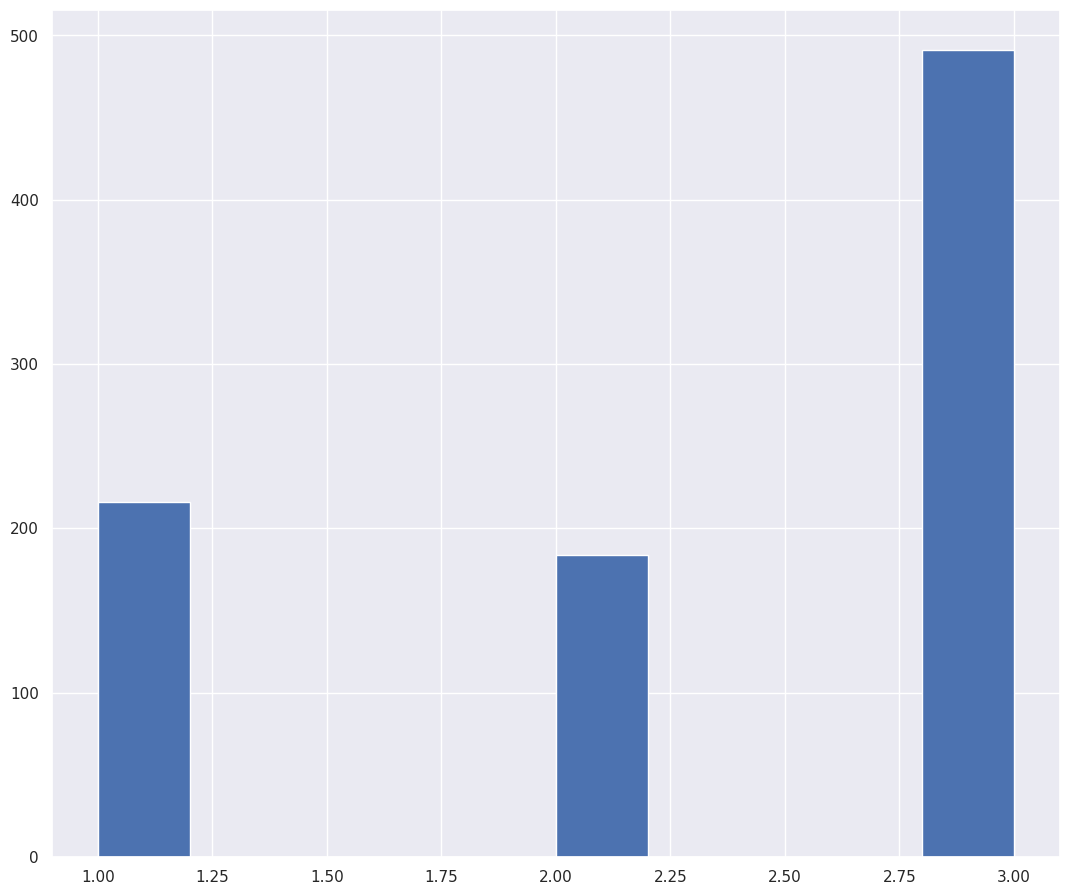

In [65]:
# Plot the histogram of Passenger's classes
plt.hist(df["Pclass"])

<ipython-input-66-1ee60dfb211f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Sex").mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


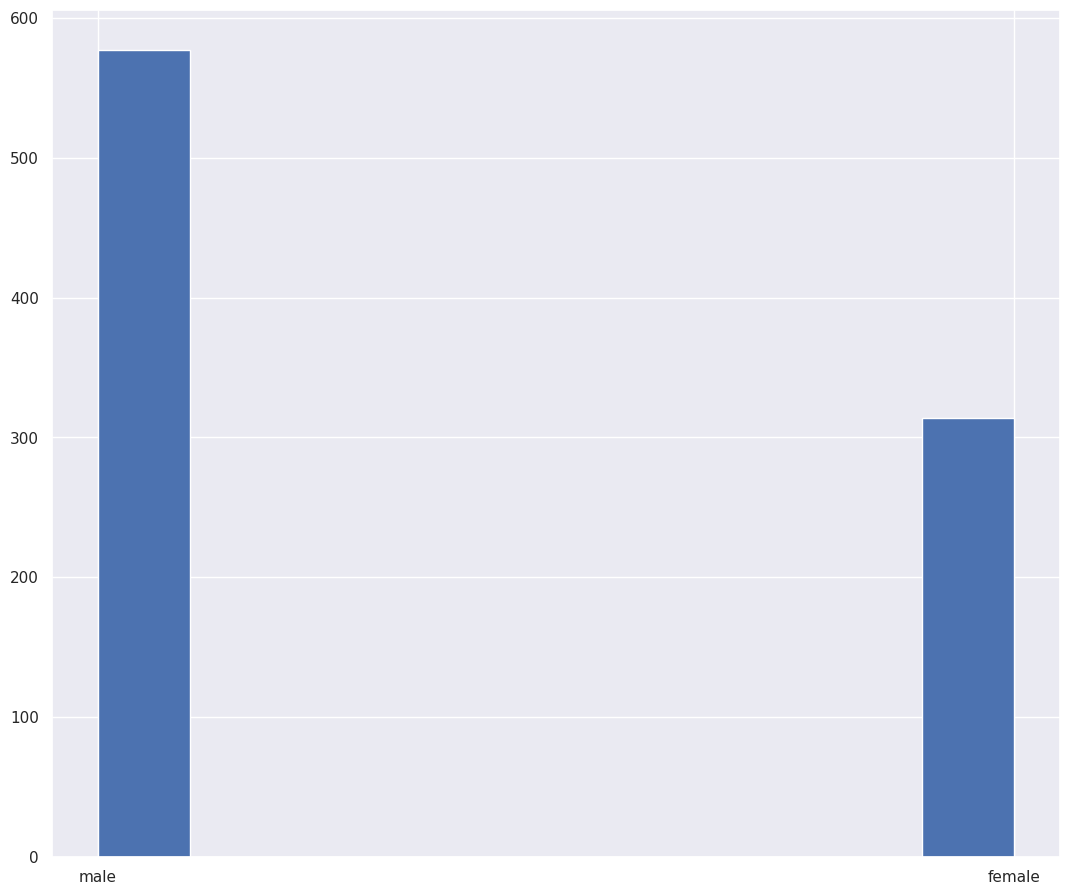

In [66]:
# Comment about the impact of the sex of passengers
plt.hist(df["Sex"])
df.groupby("Sex").mean()

The females were most likely to survive than males, notably.

In [67]:
# Comment about the impact of the embarkation city. How do you explain the discrepancies in survival rate?
df.groupby("Embarked").mean()

<ipython-input-67-751376c3c3a4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Embarked").mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


It seems that people embarked from C were most likely to survive.However, the survival rate difference is not that big to have an impact on the model, the city itself maybe irrelevent.

<function matplotlib.pyplot.show(close=None, block=None)>

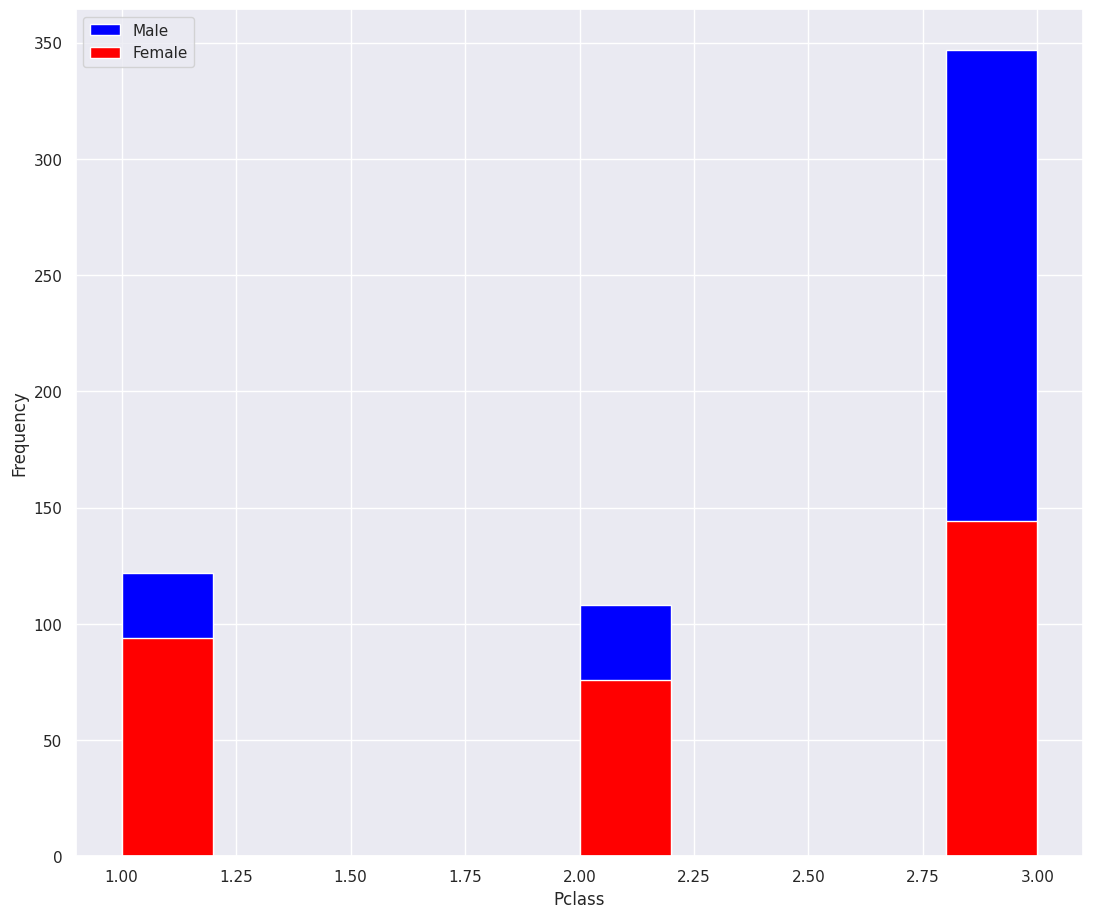

In [68]:
#Plot the histogram of the number of men in each class. Do the same for women. Comment.
# Filter male and female passengers
male_passengers = df[df['Sex'] == 'male']
female_passengers = df[df['Sex'] == 'female']

# Plot histograms for male and female passengers
plt.hist(male_passengers["Pclass"], color="blue",  label='Male')
plt.hist(female_passengers["Pclass"], color="red",  label='Female')

# Add legend
plt.legend()

# Add labels for x and y axes
plt.xlabel('Pclass')
plt.ylabel('Frequency')

plt.show

So, in both male and female sexes, the greater amount is on the 3rd class, then the first then the second, so the sex doesn't make a difference for the choice of the class.

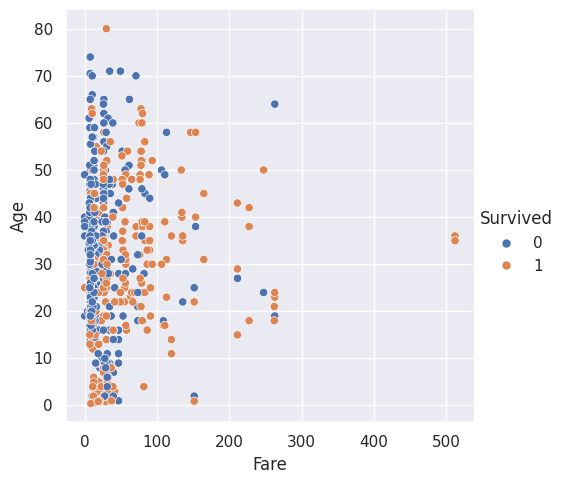

In [69]:
# Comment briefly the following code
sns.relplot(data=df,x="Fare", y="Age",hue="Survived")

The higher the fare the higher the survival rate in general. However, the greatest portion of the passangers were paying fares lower than 100.

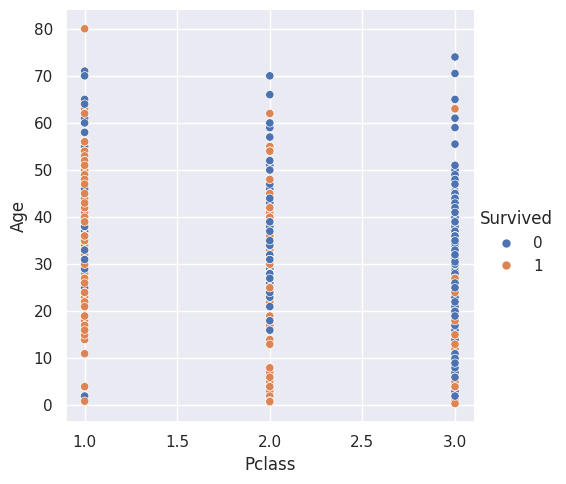

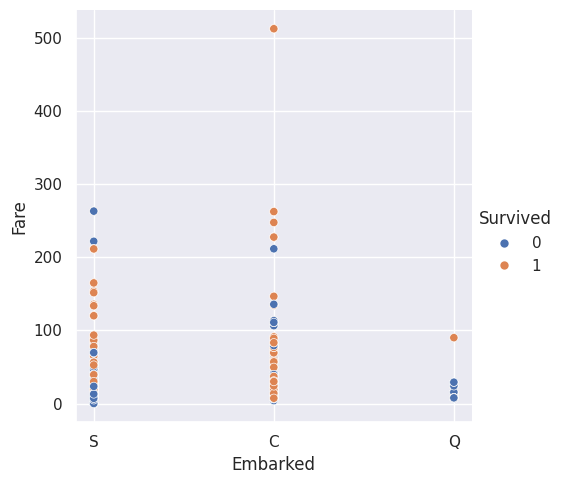

In [70]:
# In case you believe that other plots are interesting to vizualize the data set, you can provide them here.

sns.relplot(data=df,x="Pclass", y="Age",hue="Survived")
plt.show()
sns.relplot(data=df,x="Embarked", y="Fare",hue="Survived")

# Categorical encoding

Certain columns (sex, embarked, etc.) are categorical. We need to transform them into numerical features.

In [71]:
# Create a new column "Sex_num" where the strings "male" and "female" are replaced by a binary integer.
df["Sex_num"] = (df["Sex"]=="male").astype("int") #That's ok because there is no missing data in the "Sex" column

In [72]:
# What is the following code doing?
pd.get_dummies(df['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


This code is coverting one categorical value to 3 different numerical values to be learnable

In [73]:
# Using pd.get_dummies, create new columns in the dataframe df, one for each embarkation port
ports = pd.get_dummies(df['Embarked'])
df2 = pd.DataFrame(df)
df2[["C","Q","S"]] = ports
df = df2
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1,0,0


In [74]:
# We may drop the two columns "Sex" and "Embarked", as we now included their onehot counterparts in the dataframe. Check that the following code drops theses columns
df.drop(columns=["Sex","Embarked"])


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_num,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,1,0,0


In [75]:
# Use df.head(). Did the dropped column disappear? Solve possible issued using the argument inplace=True, in the drop method
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1


<ipython-input-76-9c62aa7c9f4a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

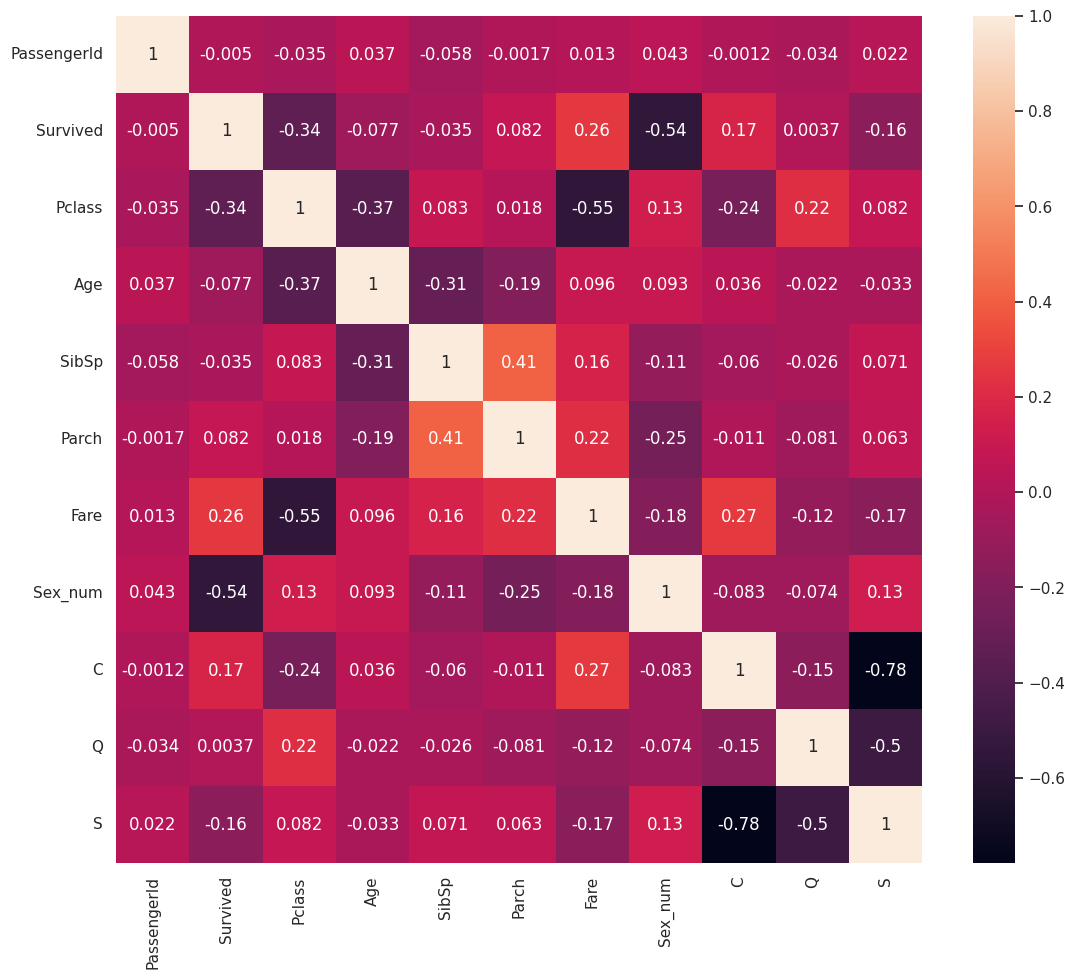

In [76]:
# What does the matrix df.corr() represent? Provide your interpretation of the numbers you see.
sns.set(rc = {'figure.figsize':(13,11)})
sns.heatmap(df.corr(),annot=True)

This is the covarience matrix of all the features we have in that dataset. We can see that there is a great correlation between sex and survival, also There is a correlation between age and the survival rate, and finally the age and the class of the passenger. There is also less correlation between the city of embarktion and survival rate, but this seems to be coming from the fare correlation. There are some meaninless correlation happening too, as the correlation between the cities.

# Data cleansing
Check the number of missing values in "Age". You can either


*   Do nothing (the rows with missing "Age" will be ignored in the training stage)
*   Or fill the missing values with some value of your choice.


Do something smart.



In [77]:
# Do something smart to handle the problem of missing values in the "Age" column
m = (df["Age"].mean())
df["Age"] = df["Age"].apply(lambda x: m if pd.isna(x) else x)
nan_count = pd.isna(df["Age"]).sum()
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,1,0,0


In [78]:
# We will train a logistic regression. Write below the columns which you would like to keep as features for logistic regression.
# n.b.: We will NOT keep the columns Ticket and Cabin. Why?
#mycolumns2 = ["Age", "Pclass", "Fare", "C", "Q", "S", "Sex_num"]
mycolumns2 = ["Age", "Fare",  "Sex_num"]
mycolumns = ["Pclass",  "Sex_num"]
#mycolumns3 = ["Age", "Fare", "C", "Q", "S", "Sex_num"]
df[mycolumns]

##nan_count = pd.isna(df["Cabin"]).sum()
##print (nan_count)
'''missing_columns = [col for col in mycolumns if col not in df.columns]
if missing_columns:
    print("Columns missing in DataFrame:", missing_columns)
else:
    print("All columns present in DataFrame.")'''

'missing_columns = [col for col in mycolumns if col not in df.columns]\nif missing_columns:\n    print("Columns missing in DataFrame:", missing_columns)\nelse:\n    print("All columns present in DataFrame.")'

Because the ticket itself is not relevent, such as the id of each passenger, just a catergorical variable with alot of categories. and the cabin is missing in 687 times of the data

#Logistic regression


In [79]:
# Train a logistic regression classifier using sklearn, based on the above dataframe and the chosen columns.
# Explain the meaning of the parameter in the logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',C=1.0,max_iter=1000)

In [80]:
# Fit the model
lr.fit(df[mycolumns],df["Survived"])

LogisticRegression(max_iter=1000)

In [81]:
# Display the coefficients of the logistic regression. Discuss the possible positive/negative impact on survival of certain parameters
lr.coef_

array([[-0.93682543, -2.55361558]])

# Performance evaluation


In [82]:
# Load the test data
Xtest = pd.read_csv("testtitanic.csv")
ytest = pd.read_csv("gender_submission.csv")
dftest = pd.merge(Xtest,ytest)

In [83]:
# Process the test features in order to obtain the same format as for the train set
# Do something smart to handle the problem of missing values in the "Age" column
dfback = dftest
m2 = (dftest["Age"].mean())
dftest["Age"] = dftest["Age"].apply(lambda x: m2 if pd.isna(x) else x)
# We may drop the two columns "Sex" and "Embarked", as we now included their onehot counterparts in the dataframe. Check that the following code drops theses columns
# Using pd.get_dummies, create new columns in the dataframe df, one for each embarkation port
ports2 = pd.get_dummies(dftest['Embarked'])
dftest[["C","Q","S"]] = ports2
pd.get_dummies(dftest['Embarked'])
dftest["Sex_num"] = (dftest["Sex"]=="male").astype("int") #That's ok because there is no missing data in the "Sex" column
dftest.drop(columns=["Sex","Embarked"], inplace = True)
dftest

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,C,Q,S,Sex_num
0,892,3,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,NaN,0,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,NaN,1,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,NaN,0,0,1,0,1
3,895,3,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,NaN,0,0,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,NaN,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,NaN,0,0,0,1,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,C105,1,1,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0,0,1,1
416,1308,3,"Ware, Mr. Frederick",30.27259,0,0,359309,8.0500,NaN,0,0,0,1,1


In [84]:
# Define a dataframe with only the columns you want to keep (and the label)
dftest=dftest[mycolumns+["Survived"]]
dftest.head()

,Pclass,Sex_num,Survived
0,3,1,0
1,3,0,1
2,2,1,0
3,3,1,0
4,3,0,1


In [85]:
# Check if there are some missing values. If needed, row containing missing values can be dropped using the dropna() method (inplace)
#m3 = dftest["Fare"].mean()
#dftest["Fare"] = dftest["Fare"].apply(lambda x: m3 if pd.isna(x) else x)

#columns_with_nan = dftest.columns[dftest.isna().any()].tolist()

# Print the columns with NaN values
#print("Columns with NaN values:", columns_with_nan)

In [86]:
# Compute the hard predictions on the test set (using only the columns to keep)
yhat = lr.predict(dftest[mycolumns])
yhat

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [87]:
# Compute the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(yhat,dftest.Survived)

1.0

In [88]:
# Compute the soft predictions unsing predict_proba
soft_predictions = lr.predict_proba(dftest[mycolumns])
soft_predictions

array([[0.89797955, 0.10202045],
       [0.40645459, 0.59354541],
       [0.77524159, 0.22475841],
       [0.89797955, 0.10202045],
       [0.40645459, 0.59354541],
       [0.89797955, 0.10202045],
       [0.40645459, 0.59354541],
       [0.77524159, 0.22475841],
       [0.40645459, 0.59354541],
       [0.89797955, 0.10202045],
       [0.89797955, 0.10202045],
       [0.57476595, 0.42523405],
       [0.09515191, 0.90484809],
       [0.77524159, 0.22475841],
       [0.09515191, 0.90484809],
       [0.21157346, 0.78842654],
       [0.77524159, 0.22475841],
       [0.89797955, 0.10202045],
       [0.40645459, 0.59354541],
       [0.40645459, 0.59354541],
       [0.57476595, 0.42523405],
       [0.89797955, 0.10202045],
       [0.09515191, 0.90484809],
       [0.57476595, 0.42523405],
       [0.09515191, 0.90484809],
       [0.89797955, 0.10202045],
       [0.09515191, 0.90484809],
       [0.89797955, 0.10202045],
       [0.57476595, 0.42523405],
       [0.89797955, 0.10202045],
       [0.

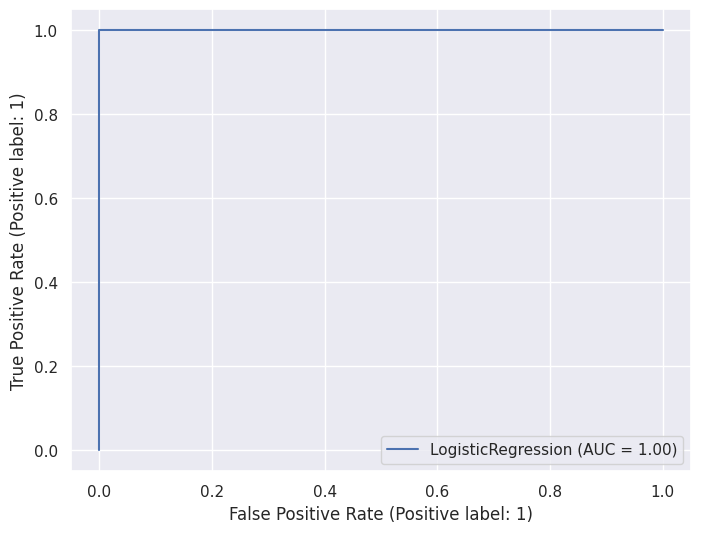

In [98]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(lr,dftest[mycolumns],dftest["Survived"],ax=ax)
plt.show()

# Bonus question: do whatever you find useful

Here are some examples:

*   Try to include useful elements of the Cabin number
*   Try different regularization parameters
* Try L1 regularization instead of ridge
* Try linear regression





So, at the beginning I included both fare and pclass in the features that I want to consider in addition to the cities, but the acccuracy was 0.94. Then, I tried [sex_num, age , and fare] and the accuracy was 0.98. Then I tried with only [sex_num and Pclass] and it was 1.0 accuracy, which is the perfect accuracy.